# Binning Variables
If you are dealing with data that has a very wide range of input variables on a continuous scale, such as age or housing prices, you can often get more meaning out of your data by binning into buckets and examing them as a group rather than as individual data points. 

With binning, we are pretty much taking a continuous variable an putting it into a meaningful bucket- the opposite of what we were doing with encoding. 

For example, if our dataset contains age, it would more meaningful to bin it into Toddler, Child, Teenager, Adult, etc. instead of comparing across every possible age. We can use pandas cut function to easily bin data. 

### Datset 
For this walk-through, we'll use the [cardio-train](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset/) dataset from Kaggle that contains the following: 
Features:

- Age in days
- Height in cm
- Weight in kg
- Gender - categorical code 
- Systolic blood pressure 
- Diastolic blood pressure 
- Cholesterol - 1: normal, 2: above normal, 3: well above normal 
- Glucose - 1: normal, 2: above normal, 3: well above normal 
- Smoking - binary 
- Alcohol intake - binary 
- Physical activity -binary 
- Presence or absence of cardiovascular disease - binary (these are our targets)
All of the dataset values were collected at the moment of medical examination

In [2]:
import pandas as pd
cardio = pd.read_csv("../../Datasets/cardio_train.csv", sep=",") 
cardio.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393    male     168    62.0    110     80            1     1      0   
1   1  20228  female     156    85.0    140     90            3     1      0   
2   2  18857  female     165    64.0    130     70            3     1      0   
3   3  17623    male     169    82.0    150    100            1     1      0   
4   4  17474  female     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

### Age range
Let's start by taking a look at the age ranges we are working with: 

In [3]:
cardio.age.min()

10798

In [4]:
cardio.age.max()

23713

That's a pretty large age range, so we can most likely get more meaning by breaking these up into bins. We have ages from 29 to 65, so let's start with binning this into four buckets, one for each age group: 

## Pandas Cut()
The syntax for pandas cut is: 
`pd.cut(df.column, num_bins)`

In [5]:
cardio4 = pd.cut(cardio.age, 4)

This returns to us a series of categorical objects that provide buckets we can use to split our data: 

In [6]:
for x in cardio4.unique():
    print(x)

(17255.5, 20484.25]
(20484.25, 23713.0]
(14026.75, 17255.5]
(10785.085, 14026.75]


- '(' means the value is included in the bin
- '[' means the value is excluded

### Examining Age Distribution
We can see that pandas cuts the data into four bins, but these bins don't necessarily make the most sense for our dataset. Let's take a look at the age distribution of our dataset: 

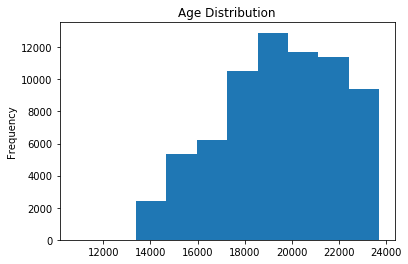

In [8]:
%matplotlib inline
cardio.age.plot(kind='hist', title='Age Distribution')

## Creating Custom Bins
It would make a lot more sense to divide our data up into decades. Let's first convert our data to years so that it's easier to work with: 

In [9]:
cardio['age'] = round(cardio.age/365, 0).astype(int)

In [10]:
cardio.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50    male     168    62.0    110     80            1     1      0   
1   1   55  female     156    85.0    140     90            3     1      0   
2   2   52  female     165    64.0    130     70            3     1      0   
3   3   48    male     169    82.0    150    100            1     1      0   
4   4   48  female     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

Ah, that's much better. Let's take another look now that we're working in years: 

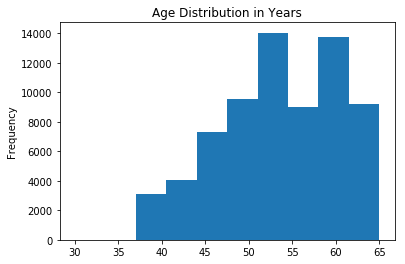

In [117]:
cardio.age.plot(kind='hist', title='Age Distribution in Years')

Looking at our distribution, we can see that it would make more sense to bin this data by decades. We can create an array of cutoffs to use in the cut function: 

In [118]:
bins = [30, 40, 50, 60, 70]

In [119]:
pd.cut(cardio.age, bins).head()

0    (40, 50]
1    (50, 60]
2    (50, 60]
3    (40, 50]
4    (40, 50]
Name: age, dtype: category
Categories (4, interval[int64]): [(30, 40] < (40, 50] < (50, 60] < (60, 70]]

Notice that the list we fed to the cut function uses each number as the edge of the bins. 

I know what you're about to ask; what if you have hundreds of bins? Am I really supposed to make a list of bins by hand?? 

Absolutely not. Remember range()? 

In [12]:
bins = list(range(30,75, 10)) # remember the end point is not included

In [13]:
bins

[30, 40, 50, 60, 70]

## Adding labels
And now that we know how to bin our data, we can also add labels that let us easily group and filter our data using our newly created bins. We just need to add one more argument to the cut function that contains n-1 as many labels as we have bins: 

In [14]:
cardio['age_cat'] = pd.cut(cardio.age, bins=bins, labels=["30-40", "40-50", "50-60", "60-70"])

In [123]:
cardio.head()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0   50    male     168    62.0    110     80            1     1      0   
1   1   55  female     156    85.0    140     90            3     1      0   
2   2   52  female     165    64.0    130     70            3     1      0   
3   3   48    male     169    82.0    150    100            1     1      0   
4   4   48  female     156    56.0    100     60            1     1      0   

   alco  active  cardio age_cat  
0     0       1       0   40-50  
1     0       1       1   50-60  
2     0       0       1   50-60  
3     0       1       1   40-50  
4     0       0       0   40-50

In [124]:
cardio.tail()

id  age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
69995  99993   53    male     168    76.0    120     80            1     1   
69996  99995   62  female     158   126.0    140     90            2     2   
69997  99996   52    male     183   105.0    180     90            3     1   
69998  99998   61  female     163    72.0    135     80            1     2   
69999  99999   56  female     170    72.0    120     80            2     1   

       smoke  alco  active  cardio age_cat  
69995      1     0       1       0   50-60  
69996      0     0       1       1     60+  
69997      0     1       0       1   50-60  
69998      0     0       0       1     60+  
69999      0     0       1       0   50-60

## How many people in each age bin have cardiovascular disease? 

In [130]:
cardio.groupby("age_cat")["cardio"].sum()

age_cat
30-40      715
40-50     8188
50-60    18872
60+       7204
Name: cardio, dtype: int64

Do you think age might be a factor in cardiovascular disease? 